In [4]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

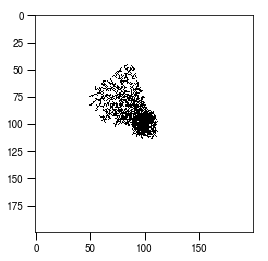

In [5]:
x0 = 100
y0 = 100

Nsteps = 10000
box_size = 200

lightning = np.zeros((box_size, box_size))
lightning[x0,y0] = 1.
# neighbor pixel directions
nx = [-1, -1, 0, 1, 1, 1, 0, -1]
ny = [0, 1, 1, 1, 0, -1, -1, -1]

for n in range(Nsteps):
    grew_cluster_flag = False
    # start a random walk
    distance = (box_size-np.sqrt(pow(x0,2) + pow(y0,2))) * rand.random()
    phi = 2.*np.pi * rand.random()
    x_idx = int(x0 + distance * np.cos(phi))
    y_idx = int(y0 + distance * np.sin(phi))
        
    while(grew_cluster_flag == False):

        # check to see if we are near a cluster
        for k in range(8):
            xn = x_idx + nx[k]
            yn = y_idx + ny[k]
            if lightning[xn,yn] == 1:
                lightning[x_idx,y_idx] = 1
                grew_cluster_flag = True
                break

        #if we didn't get a cluster keep walking
        a = rand.randint(0, 7)
        x_idx = x_idx + nx[a]
        y_idx = y_idx + ny[a]
        
        if abs(x_idx) >= box_size/2 or abs(y_idx) >= box_size/2:
            break
            
    if(n % 200 == 0):
        # use this link to change the colors; replace binary with prism for example!
        # https://matplotlib.org/gallery/color/colormap_reference.html
        plt.imshow(lightning, cmap = plt.cm.binary) 
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.0001)

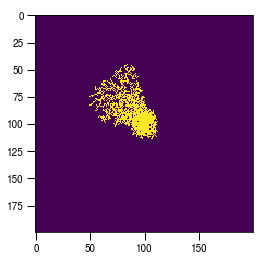

In [6]:
plt.imshow(lightning)